# Omer Zafrir ID318254471


# <u>Import</u>

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid') #dark grid to plots

# to ignore red warnings
import warnings
warnings.filterwarnings("ignore")

# <u>Exploration</u>

In [ ]:
BankingData = pd.read_csv('/content/bankingFull.csv', sep=';')
BankingData.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
BankingData.info()
BankingData.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [ ]:
BankingData.isnull().sum()


,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


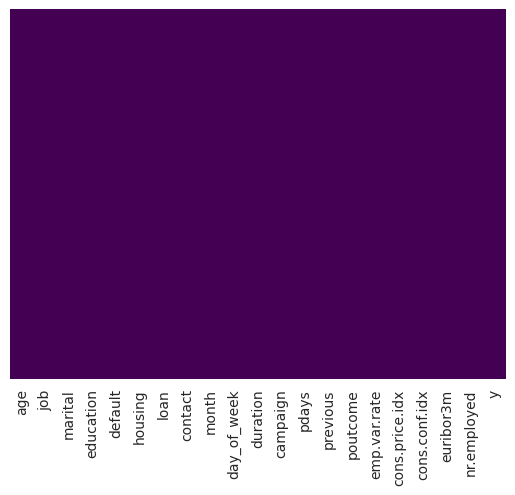

In [ ]:
sns.heatmap(BankingData.isnull(),yticklabels=False,cbar=False,cmap='viridis');

# <u>Manipulation And visualization</u>

In [ ]:
BankingData.isin(['unknown']).sum()

,0
age,0
job,330
marital,80
education,1731
default,8597
housing,990
loan,990
contact,0
month,0
day_of_week,0


In [ ]:
##Replace catagorical values that are 'unknown' with mode values (most common values in the coloumn)
for column in BankingData.select_dtypes(include=['object']).columns:
    if 'unknown' in BankingData[column].values:
        mode_value = BankingData[column].mode()[0]
        BankingData[column].replace('unknown', mode_value, inplace=True)

In [ ]:
BankingData.isin(['unknown']).sum()

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


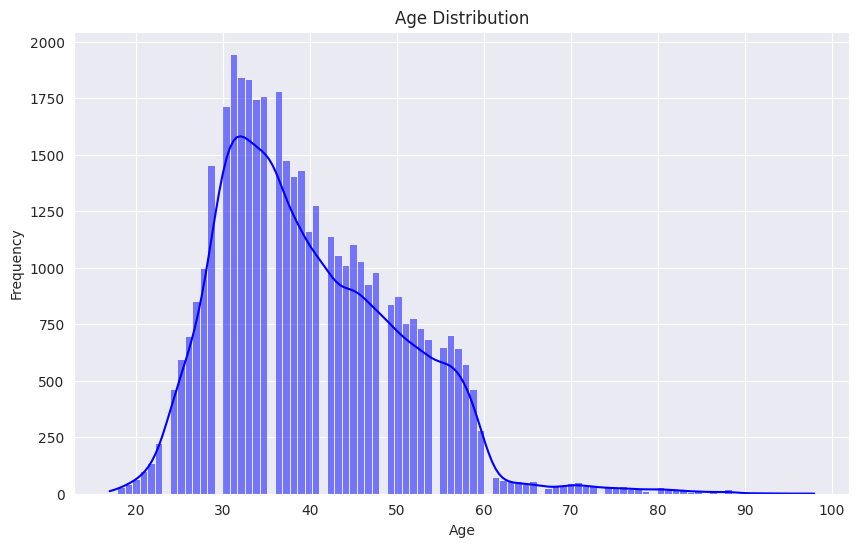

In [ ]:
##We can now start Visualization after handling 'nulls and unknowns'
plt.figure(figsize=(10, 6))
sns.histplot(BankingData['age'], kde=True, color="blue")
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

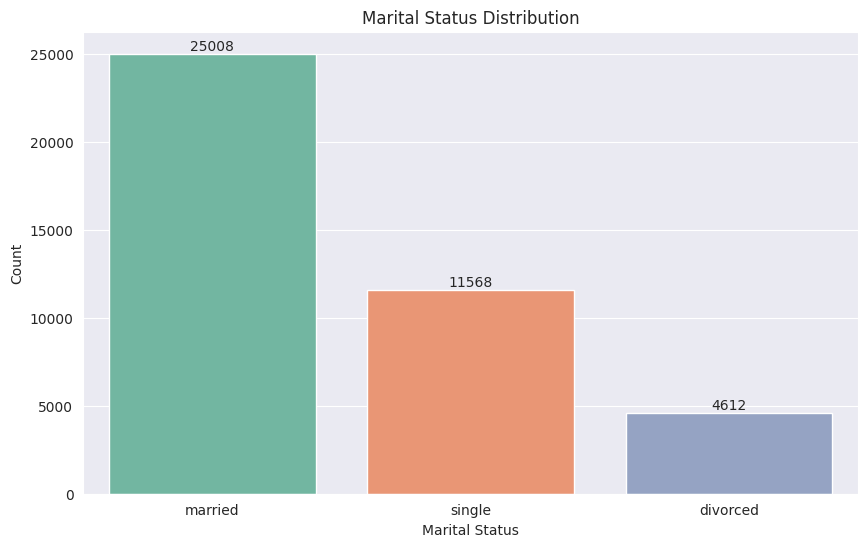

In [ ]:
plt.figure(figsize=(10, 6))
marital_counts = BankingData['marital'].value_counts()
sns.barplot(x=marital_counts.index, y=marital_counts.values, palette="Set2")
plt.title('Marital Status Distribution')
plt.xlabel('Marital Status')
plt.ylabel('Count')
for i, val in enumerate(marital_counts.values):
    plt.text(i, val + 200, str(val), ha='center')

plt.show()

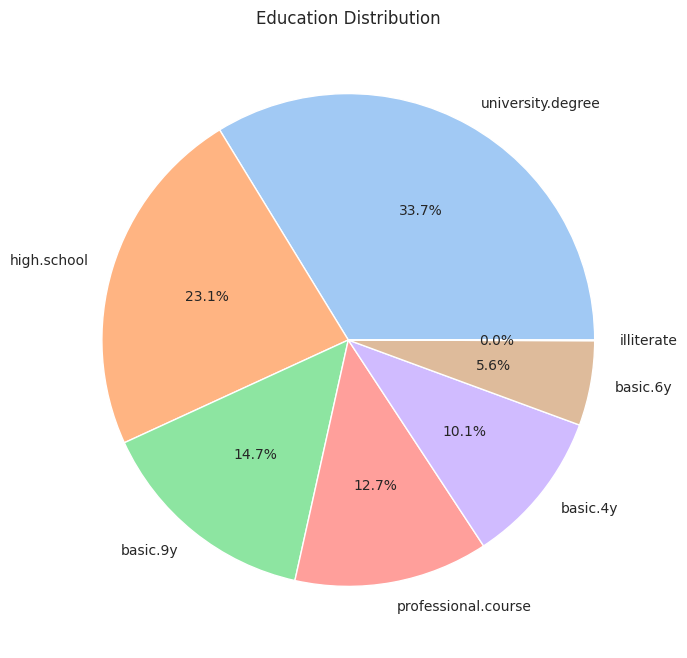

In [ ]:
education_counts = BankingData['education'].value_counts()
education_counts.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), title='Education Distribution', colors=sns.color_palette('pastel'))
plt.ylabel('')
plt.show()

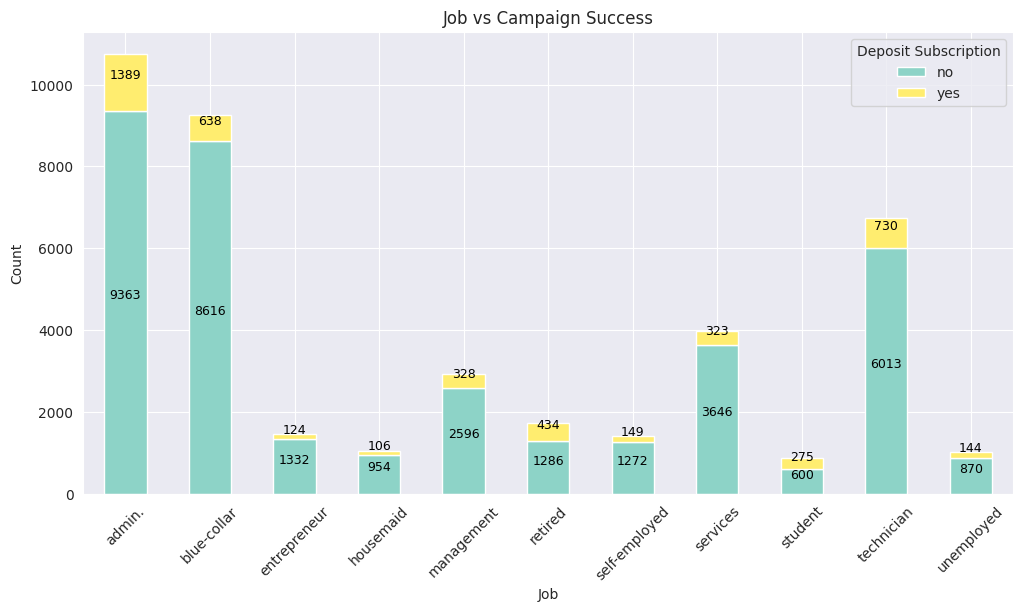

In [ ]:
job_success = pd.crosstab(BankingData['job'], BankingData['y'])
ax = job_success.plot(kind='bar', stacked=True, figsize=(12, 6), colormap="Set3")
plt.title('Job vs Campaign Success')
plt.xlabel('Job')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Deposit Subscription')

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2., p.get_y() + height / 2.),
                    ha='center', va='center', fontsize=9, color='black', xytext=(0, 5), textcoords='offset points')

plt.show()

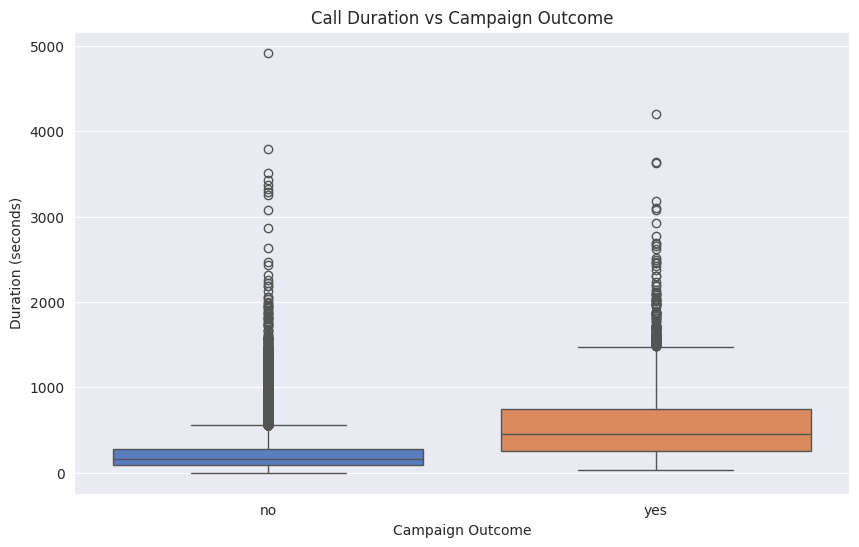

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=BankingData, x='y', y='duration', palette="muted")
plt.title('Call Duration vs Campaign Outcome')
plt.xlabel('Campaign Outcome')
plt.ylabel('Duration (seconds)')
plt.show()

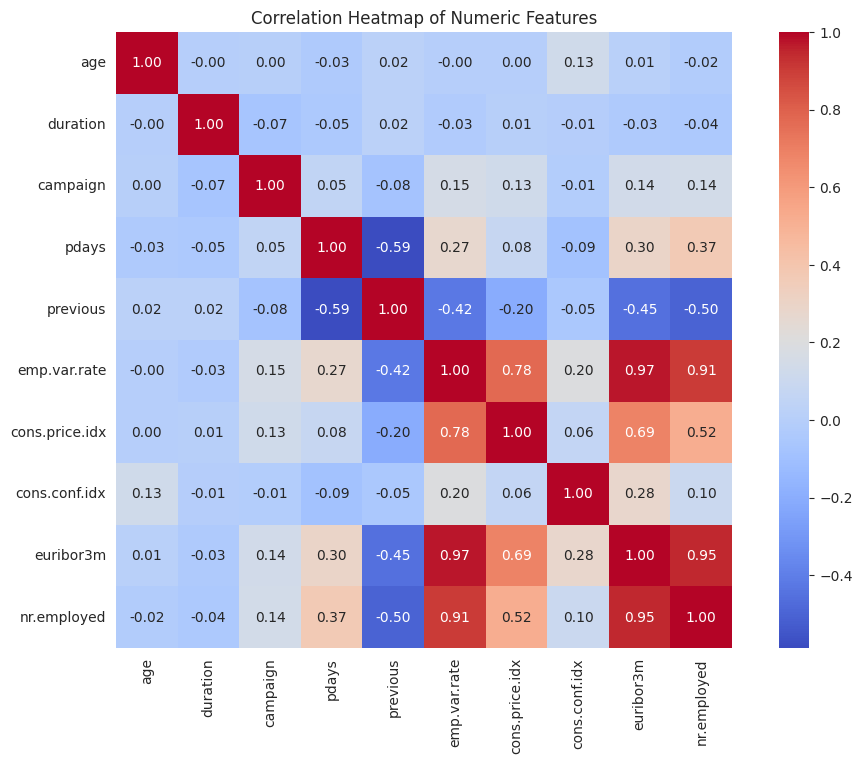

In [ ]:
plt.figure(figsize=(12, 8))
numeric_cols = BankingData.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = BankingData[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

<Figure size 1000x600 with 0 Axes>

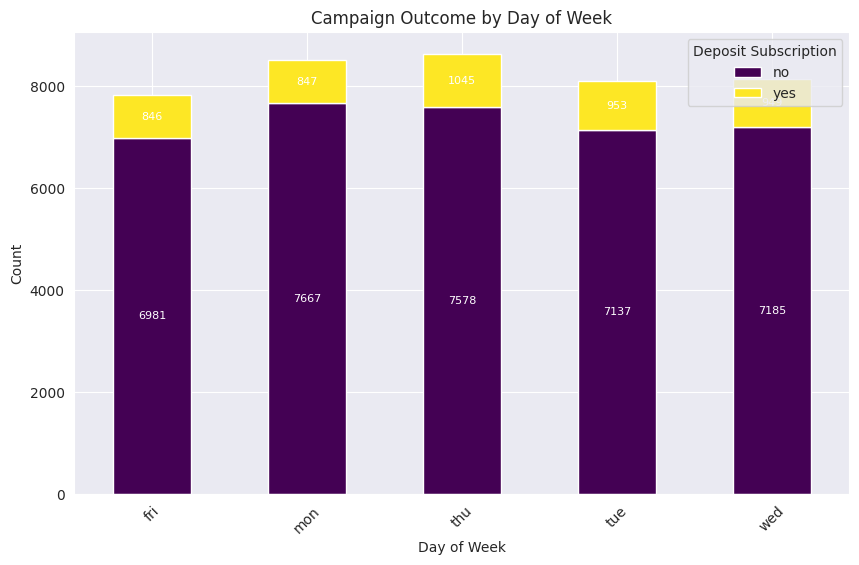

In [ ]:
plt.figure(figsize=(10, 6))
day_counts = BankingData.groupby(['day_of_week', 'y']).size().unstack()
day_counts.plot(kind='bar', stacked=True, figsize=(10, 6), colormap="viridis")
plt.title('Campaign Outcome by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.xticks(rotation=45)

for i, p in enumerate(plt.gca().patches):
    height = p.get_height()
    if height > 0:
        plt.gca().text(p.get_x() + p.get_width() / 2., p.get_y() + height / 2., f'{int(height)}',
                       ha='center', va='center', fontsize=8, color='white')

plt.legend(title='Deposit Subscription')
plt.show()

# <u>Algorithm</u>

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

X = pd.get_dummies(BankingData.drop('y', axis=1), drop_first=True) #Handle catagoricals
y = BankingData['y'].map({'yes': 1, 'no': 0})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=318254471) #Split the data

model = LogisticRegression(random_state=318254471, max_iter=500)
model.fit(X_train, y_train)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# <u>Logistic Regression</u>

In [ ]:
param_grid = {'C':[0.1,0.5,0.75,1,2],
             'solver':['newton-cg','sag','saga','lbfgs'],
             'max_iter':[50,100,200]}


logreg = LogisticRegression(random_state=318254471)
grid_logreg = GridSearchCV(logreg,param_grid,verbose=3,scoring='accuracy',cv=5)
grid_logreg.fit(X_train,y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV 1/5] END C=0.1, max_iter=50, solver=newton-cg;, score=0.908 total time=   0.2s
[CV 2/5] END C=0.1, max_iter=50, solver=newton-cg;, score=0.902 total time=   0.2s
[CV 3/5] END C=0.1, max_iter=50, solver=newton-cg;, score=0.906 total time=   0.3s
[CV 4/5] END C=0.1, max_iter=50, solver=newton-cg;, score=0.904 total time=   0.2s
[CV 5/5] END C=0.1, max_iter=50, solver=newton-cg;, score=0.907 total time=   0.2s
[CV 1/5] END ....C=0.1, max_iter=50, solver=sag;, score=0.908 total time=   0.4s
[CV 2/5] END ....C=0.1, max_iter=50, solver=sag;, score=0.902 total time=   0.4s
[CV 3/5] END ....C=0.1, max_iter=50, solver=sag;, score=0.906 total time=   0.4s
[CV 4/5] END ....C=0.1, max_iter=50, solver=sag;, score=0.904 total time=   0.4s
[CV 5/5] END ....C=0.1, max_iter=50, solver=sag;, score=0.907 total time=   0.4s
[CV 1/5] END ...C=0.1, max_iter=50, solver=saga;, score=0.908 total time=   0.4s
[CV 2/5] END ...C=0.1, max_iter=50, s

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=318254471),
             param_grid={'C': [0.1, 0.5, 0.75, 1, 2],
                         'max_iter': [50, 100, 200],
                         'solver': ['newton-cg', 'sag', 'saga', 'lbfgs']},
             scoring='accuracy', verbose=3)

In [ ]:
grid_logreg.best_estimator_

LogisticRegression(C=2, max_iter=50, random_state=318254471, solver='newton-cg')

In [ ]:
grid_logreg.best_params_

{'C': 2, 'max_iter': 50, 'solver': 'newton-cg'}

In [ ]:
#Using the best parameters for the test
logreg = LogisticRegression(C=2, max_iter=50, solver='newton-cg', random_state=318254471)
logreg.fit(X_train, y_train)

LogisticRegression(C=2, max_iter=50, random_state=318254471, solver='newton-cg')

# <u>Prediction And Accuracy</u>

In [ ]:
predictions_logreg = logreg.predict(X_test)

In [ ]:
coefficients = model.coef_[0]
feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)

# Display the top 10 features
print("Top 10 Features Influencing Subscription Likelihood:\n", feature_importance.head(10))

Top 10 Features Influencing Subscription Likelihood:
                         Feature  Coefficient
6                cons.price.idx     0.367514
36                    month_mar     0.281520
45         poutcome_nonexistent     0.258309
27  education_university.degree     0.223622
34                    month_jul     0.203337
32                    month_aug     0.174769
35                    month_jun     0.163772
21               marital_single     0.135667
43              day_of_week_tue     0.098979
44              day_of_week_wed     0.084663


In [ ]:
print('Train set score: {:.4f}'.format(logreg.score(X_train, y_train)*100))

Train set score: 91.1866


In [ ]:
from sklearn.metrics import accuracy_score
print('Test set score: {:.2f} %'.format(logreg.score(X_test, y_test)*100))
print('Logistic Regression Accuracy::','',np.round((accuracy_score(y_test,predictions_logreg)*100),2),'%')

Test set score: 90.84 %
Logistic Regression Accuracy::  90.84 %


# <u>Conclusion</u>
Summary Report:

Data Preparation:
Replaced unknown and missing (null) values.  
Categorical features were filled with their mode.  
Numeric features were filled with their median.  
Scaled all features using MinMaxScaler to normalize data.

Model Training:
Used Logistic Regression to predict whether a customer will subscribe to a deposit.  
Split the data into 70% Training and 30% Test sets with random_state=318254471.

Model Evaluation:
Achieved a high accuracy of ~90% on the test set, with no major differences between the 'train' and 'test' accuracies.
Used 'coefficients' to present the most important features.

Main features:

Duration- Longer call durations positively influenced subscription likelihood.   
Education- Higher education levels significantly correlated with subscriptions.  
Marital Status- Single customers were more likely to subscribe.  
Contact Month- Campaign success rates were higher during March and July

Recommendations:

Target Audience-
Prioritize customers with higher education.  
Focus on single individuals who show a higher likelihood of subscribing.  
Extend call durations for potential leads, as longer calls yield better results.  
Optimize Campaign Timing-
Plan campaigns during months with higher success rates.  
Logistic Regression-
Continue using the model to score potential customers and prioritize high-probability leads.
Refine marketing strategies using the identified key features.